# Titanic Survival Classification
There are a number of issues with the Python and also with the data science in this notebook. 

In [56]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

df = pd.read_csv('/Users/savsec/Downloads/train.csv')



df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Clean-up of Missings & Categorical Variables

In [60]:
relevant = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [61]:
df = df.loc[:,relevant]

In [62]:
def eliminateMissing(column_name):
    if df.loc[:,column_name].dtypes.name == 'float64':
        df.loc[:, column_name] = df.loc[:, column_name].fillna(-1)
    elif df.loc[:, column_name].dtypes.name == 'object':
        df.loc[:, column_name] = df.loc[:, column_name].fillna('missing')

eliminateMissing('Age')
eliminateMissing('Cabin')
eliminateMissing('Embarked')

In [63]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [64]:
train, test = sklearn.model_selection.train_test_split(df)

In [65]:
le = preprocessing.LabelEncoder()
def transform_categoricals(df1, column_name):
    df1.loc[:, column_name] = le.fit_transform(df1.loc[:, column_name])

In [66]:
for j in range(len(list(train))):
    if train.iloc[:,j].dtypes.name == 'object':
        transform_categoricals(train, train.columns[j])

train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int64
Embarked      int64
dtype: object

## Fit the model

In [67]:
m = ensemble.RandomForestClassifier(n_estimators=500, min_samples_split=0.2, max_features=None)

In [68]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [69]:
m.fit(X=train.loc[:, predictors], y=train.Survived)

RandomForestClassifier(max_features=None, min_samples_split=0.2,
                       n_estimators=500)

## Out-of-sample Test


In [70]:
for j in range(len(list(test))):
    if test.iloc[:,j].dtypes.name == 'object':
        transform_categoricals(test, test.columns[j])

In [71]:
predictions = pd.Series(m.predict(test.loc[:, predictors]), name='predictions', index=test.index)

Accuracy: 0.7668161434977578


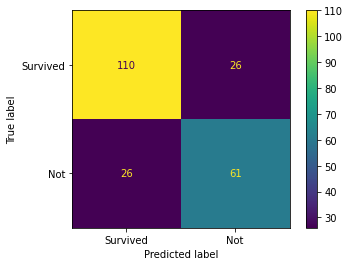

In [72]:
comparer = pd.concat([test.Survived, predictions], axis=1)

cm = confusion_matrix(comparer.Survived, comparer.predictions)

disp=ConfusionMatrixDisplay(cm, display_labels=['Survived', 'Not'])
disp.plot()
acc= accuracy_score(comparer.Survived, comparer.predictions)
print(f"Accuracy: {acc}")

